Why transformation of features is required?

1. Linear regression, logistic regression - Gradient descent - we try to find global minima  (check this in ML notes)
2. Algorithms like KNN, K Means, Hierarchial clustering - They all use eucledian distance to find the distance between 2 points.

Every point has vectors and direction, and if there is a huge difference between this points, then calculating the distance may take more time. Hence, we should scale down this values.

If we are trying to calculate the eucledian distance or find the global minima, sometimes values in features are too bin or not in same scale, so distance gets too big. So, if we transofrm them the process of calculating the distance or global minima gets easier. We would see this in example.

But this transformations are not required for all machine learning algorithms. Wherever eucledian distance/ gradient descent  concept is used, we have to do tranformations.

In decision tree, random forest, ensemble techniques, xgboost, adaBoost etc.., we do not require transformation. 
In Deep learning techniques like ANN, CNN, RNN, we do require transofrmation/standardisation/scaling, as there is a concept of global minima/ gradient descent present in this techniques.

Like for example, in CNN, in images, pixels are from 0-255, so we transform them in a range from 0-1.

We would learn about below transformations in this notebook.

1. Normalisation and standardisation
2. Scaling to Minimum and Maximum values.
3. Scaling to Median and Quantiles.
4. Gaussian Transformation - There are a lot of transformation in this. Some are given below:
    1. Logarithmic Transformation
    2. Reciprocal Transformation
    3. Square Root Transformation
    4. Exponential Transformation
    5. Box Cox Transformation

If you scale the data, the accuracy and performance of model increases.

1. Standardisation : 

Here, we try to bring all features to a similar scale.  Standardisation means centering the variable at zero. (mean 0, standard deviation 1)
Basically data would follow standard normal distribution

Standardisation formula : z= (x-x_mean/std)


## If you have data with standard normal distribution , go with standard scaler.

Most of the times we use standard scaler as it works better with most of the algorithms.

In [1]:
import pandas as pd
# Lets use titanic dataset to understand this concepts.

data = pd.read_csv("Titanic.csv", usecols=["Pclass","Age","Fare","Survived"])
data

C:\Users\aishp\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,NaN,23.4500
889,1,1,26.0,30.0000


In [2]:
data.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [3]:
# Lets take care of null values in AGE by any one of the imputation methods. Main focus is on transformation in this lecture.

#Lets replace null values in AGE with median
data["Age"].fillna(data["Age"].median(), inplace=True)

C:\Users\aishp\AppData\Local\Temp\ipykernel_39184\435713462.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].median(), inplace=True)


In [4]:
data.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [5]:
data

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,28.0,23.4500
889,1,1,26.0,30.0000


## We perform standarisation using standardscaler from sklearn library.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
# Lets create the object of StandardScaler.
scaler = StandardScaler()

# Difference between fit and fit_transform

we use fit_transform when we have to transform our variable. We use fit while training the machine learning algo on data. 

In [8]:
transformed_data = scaler.fit_transform(data)
transformed_data

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [9]:
# Here, the tranformation would happen column wise. So, the above mentioned formula would be applied on entire column. 

transformed_df = pd.DataFrame(transformed_data,columns=data.columns)
transformed_df # Here, all columns are present in the same order they are present in original dataframe. So, we can take column names directly and use them here.

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


C:\Users\aishp\AppData\Local\Temp\ipykernel_39184\1882207500.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df["Survived"])
C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Survived', ylabel='Density'>

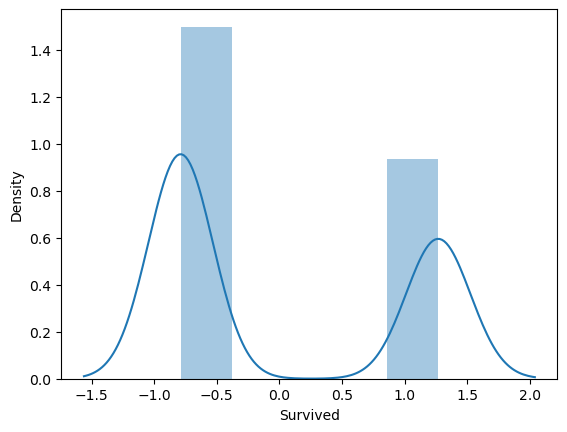

In [10]:
import seaborn as sns

sns.distplot(transformed_df["Survived"])

C:\Users\aishp\AppData\Local\Temp\ipykernel_39184\1956301403.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df["Pclass"])
C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Pclass', ylabel='Density'>

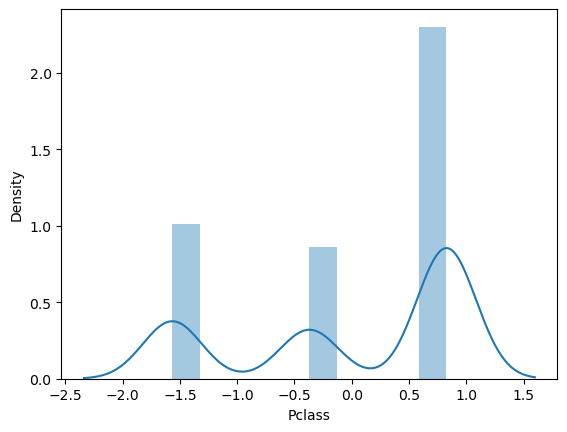

In [11]:
sns.distplot(transformed_df["Pclass"])

C:\Users\aishp\AppData\Local\Temp\ipykernel_39184\2696233179.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df["Age"]) #Following gaussian distribution
C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

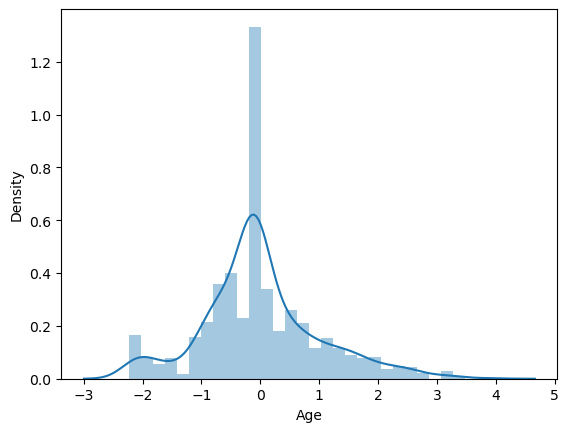

In [12]:
sns.distplot(transformed_df["Age"]) #Following gaussian distribution

C:\Users\aishp\AppData\Local\Temp\ipykernel_39184\3665369690.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df["Fare"]) # Following right skewed distribution
C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Density'>

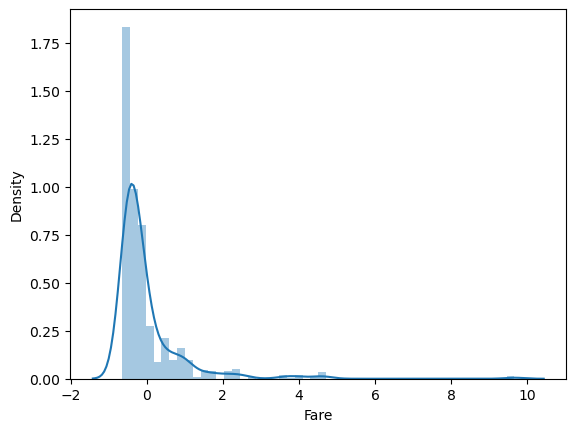

In [13]:
sns.distplot(transformed_df["Fare"]) # Following right skewed distribution

# 2. Min Max Scaling (Most popular in CNN- widely used in Deep Learning)

It scales the values in between 0 to 1. 
x_scaled= (x-x_min/(x_max-x_min))

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
MinMax_scaled_data = scaler.fit_transform(data)

In [15]:
MinMax_scaled_data

array([[0.        , 1.        , 0.27117366, 0.01415106],
       [1.        , 0.        , 0.4722292 , 0.13913574],
       [1.        , 1.        , 0.32143755, 0.01546857],
       ...,
       [0.        , 1.        , 0.34656949, 0.04577135],
       [1.        , 0.        , 0.32143755, 0.0585561 ],
       [0.        , 1.        , 0.39683338, 0.01512699]])

In [16]:
MinMax_scaled_df = pd.DataFrame(MinMax_scaled_data, columns=data.columns)
MinMax_scaled_df

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.346569,0.045771
889,1.0,0.0,0.321438,0.058556


C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

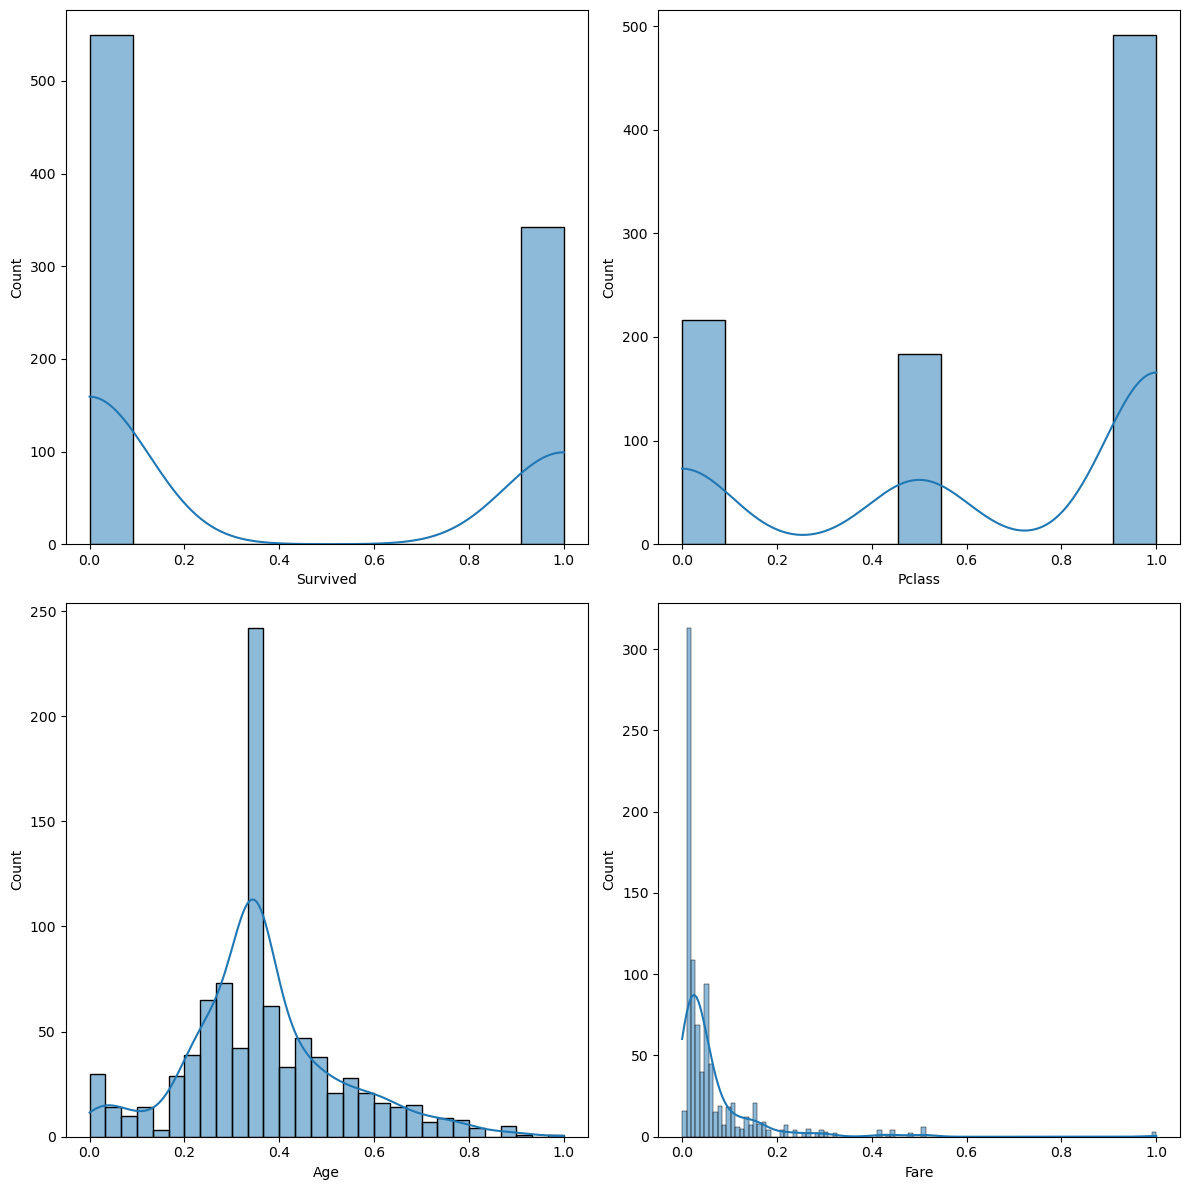

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
i=1
for column in MinMax_scaled_df.columns:
    plt.subplot(2,2,i)
    sns.histplot(MinMax_scaled_df[column], kde=True)
    i=i+1
    plt.tight_layout()
    
    


# 3.Robust Scaler

It is used to scale the features to median and quantiles.

It consists of subtracting the median from all the observations and then dividing them by the interquantile difference.
Interquantile difference is the difference between 75th quantile value and 25th quantile value.
IQR(Interquantile difference) = 75th quantile - 25th quantile
x_scaled = (x-x.median)/ IQR

Lets understand quantile by taking an example:

1,2,3,4,5,6,7,8,9,10

Now 9 is 90 the percentile because 90 percentage of all values in above data are smaller than 9.
1 is 10 percentile as 10 % of values in above data are less than 1
4 is 40th percentile as 40% of values in above data are smaller than 4

## If distribution of variable is skewed, then it is better to scale using median and quantile method as it is robust to outliers.

Advantages : 
1. Robust to outliers

In [18]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
Robust_scaled_data = scaler.fit_transform(data)

In [19]:
Robust_scaled_data

array([[ 0.        ,  0.        , -0.46153846, -0.3120106 ],
       [ 1.        , -2.        ,  0.76923077,  2.46124229],
       [ 1.        ,  0.        , -0.15384615, -0.28277666],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.38960398],
       [ 1.        , -2.        , -0.15384615,  0.67328148],
       [ 0.        ,  0.        ,  0.30769231, -0.29035583]])

In [20]:
# Lets convert this data into dataframe

robust_scaled_df = pd.DataFrame(Robust_scaled_data, columns=data.columns)
robust_scaled_df

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.076923,-0.062981
887,1.0,-2.0,-0.692308,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.153846,0.673281


C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

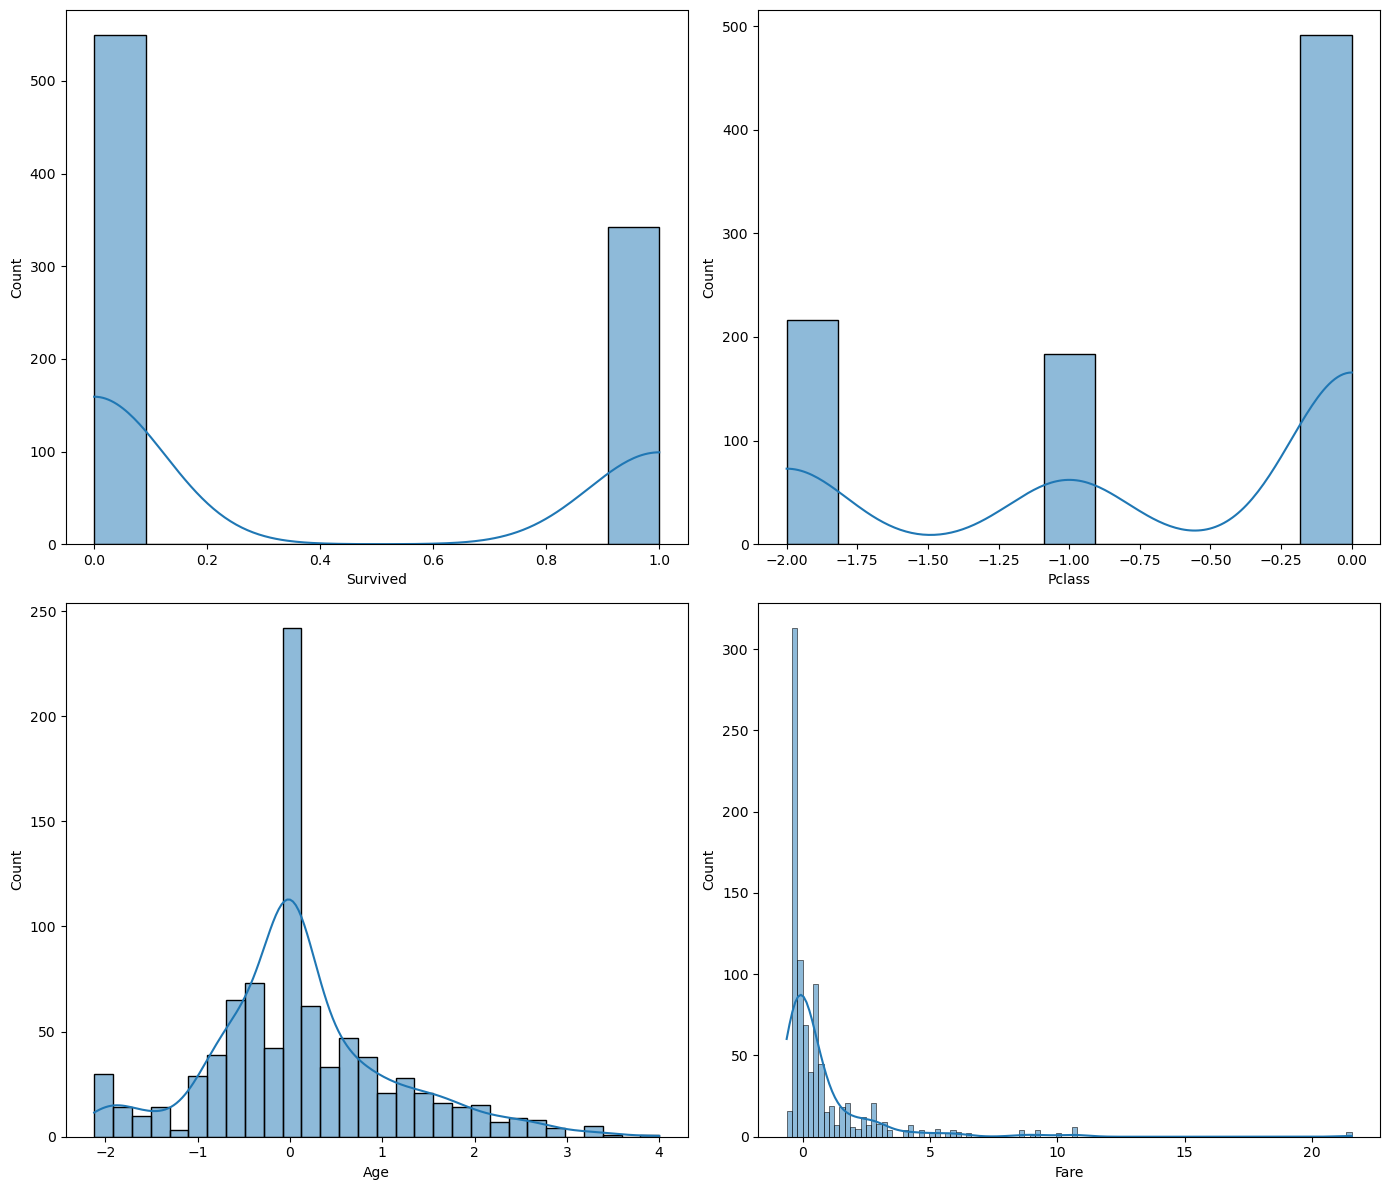

In [21]:
i=1
plt.figure(figsize=(14,12))
for column in robust_scaled_df.columns:
    plt.subplot(2,2,i)
    sns.histplot(robust_scaled_df[column], kde=True)
    i=i+1
    plt.tight_layout()
    

# 4. Gaussian Trnsformation 

Gaussian distribution == Normal distribution

If your data is not following the normal/gaussian distribution, then we can perform some methematical equations on data to convert its distribution into normal distribution.

In above example we can see that "Fare" column is not following the normal distribution, it is right skewed. So, now we will see how to convert this it into normal dustribution. Many techniques are available for that, which we will see in next section.

Why your data need to have gaussian distribution??
Some algorithms like linear regression, logistic regression works well when you features are normally distributed or follows gaussian distribution.
This algos would give better accuracy and performance if data is normally distributed.

Not algorithms require this , just some.

## A. Logarithmic transformation.

### Lets use titanic data to understand how this works.


In [22]:
data

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,28.0,23.4500
889,1,1,26.0,30.0000


In [23]:
data.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

### Lets check if columns are normally distributed, if not lets apply this transformation to convert it into normal distribution.

### If you want to check if your data is gaussian distributed/ normal distributed, we can do that by plotting Q-Q plot

In [24]:
import scipy.stats as stat
import pylab

In [25]:
def plot_qq_hist(df, feature):
    plt.subplot(1,2,1)
    sns.histplot(df[feature], kde=True)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist="norm", plot=pylab)

C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


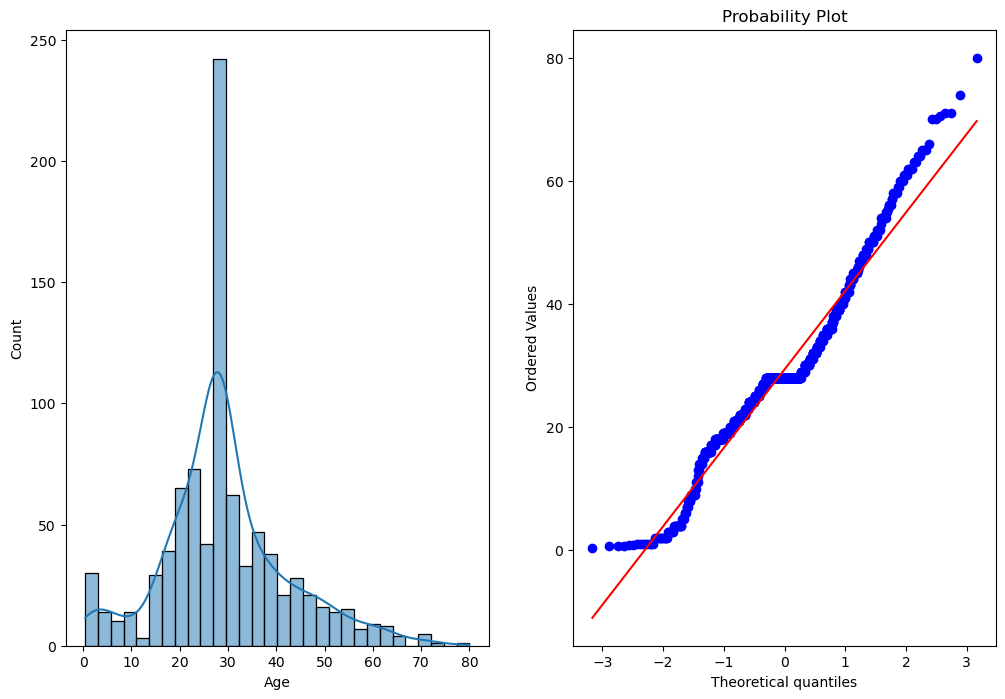

In [26]:
plt.figure(figsize=(12,8))

plot_qq_hist(data, "Age") 

### Age is following normal distribution as we can see that most points are falling on same line in 2nd Q-Q plot 

### Still lets try to apply log transformation on Age column to check if whatever conclusion we have mentioned about Age column being following the normal distribution is True or Not.

In [27]:
import numpy as np
# Lets apply log transformation on Age column

data["Age_log_transformed"] = np.log(data["Age"])
data

,Survived,Pclass,Age,Fare,Age_log_transformed
0,0,3,22.0,7.2500,3.091042
1,1,1,38.0,71.2833,3.637586
2,1,3,26.0,7.9250,3.258097
3,1,1,35.0,53.1000,3.555348
4,0,3,35.0,8.0500,3.555348
...,...,...,...,...,...
886,0,2,27.0,13.0000,3.295837
887,1,1,19.0,30.0000,2.944439
888,0,3,28.0,23.4500,3.332205
889,1,1,26.0,30.0000,3.258097


C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


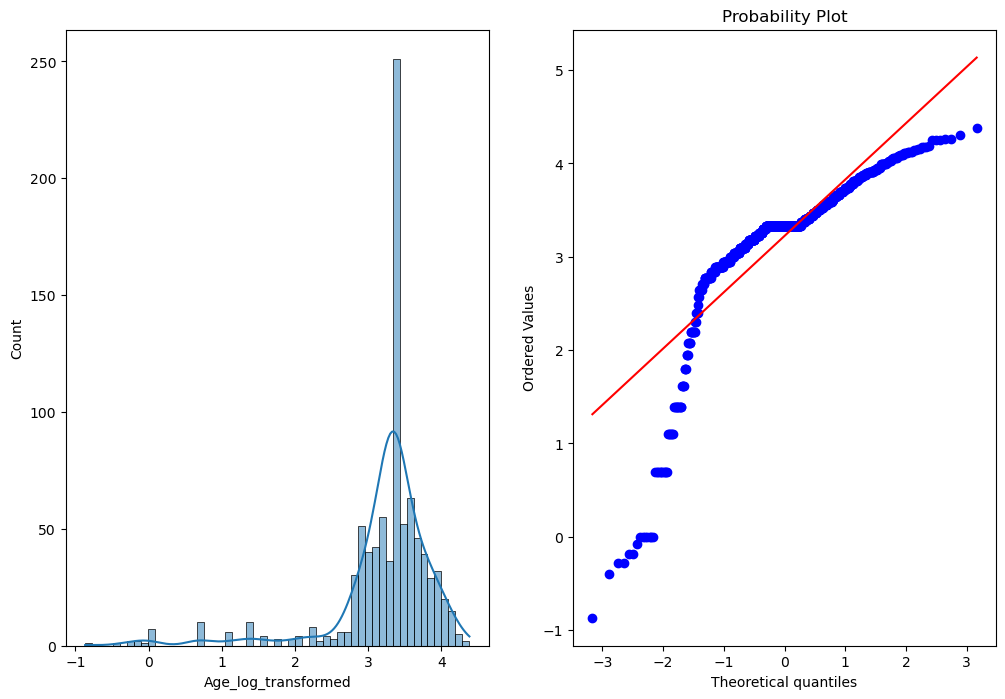

In [28]:
plt.figure(figsize=(12,8))

plot_qq_hist(data, "Age_log_transformed") 

### After performing log transformation on Age column, from above above diagram we can see that Age columnn is not following the normal distribution anymore (from both plots). Hence, the choice of using log-transformation is not correct in this case.

# B. Reciprocal Transformation

### Lets try applying reciprocal transformation on Age column to check if it gets converted into normal distribution (It is already normally distributed, we are jjust trying to apply this transformations for example purpose and to see if any transformation is making the Age column more normally distributed.

In [32]:
# Lets take the reciprocal of Age data (This is how we apply reciprocal transformation)
data["Age_reciprocal_transformed"] = 1/data["Age"] 
data

,Survived,Pclass,Age,Fare,Age_log_transformed,Fare_log_transformed,Age_reciprocal_transformed
0,0,3,22.0,7.2500,3.091042,2.110213,0.045455
1,1,1,38.0,71.2833,3.637586,4.280593,0.026316
2,1,3,26.0,7.9250,3.258097,2.188856,0.038462
3,1,1,35.0,53.1000,3.555348,3.990834,0.028571
4,0,3,35.0,8.0500,3.555348,2.202765,0.028571
...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,3.295837,2.639057,0.037037
887,1,1,19.0,30.0000,2.944439,3.433987,0.052632
888,0,3,28.0,23.4500,3.332205,3.196630,0.035714
889,1,1,26.0,30.0000,3.258097,3.433987,0.038462


C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


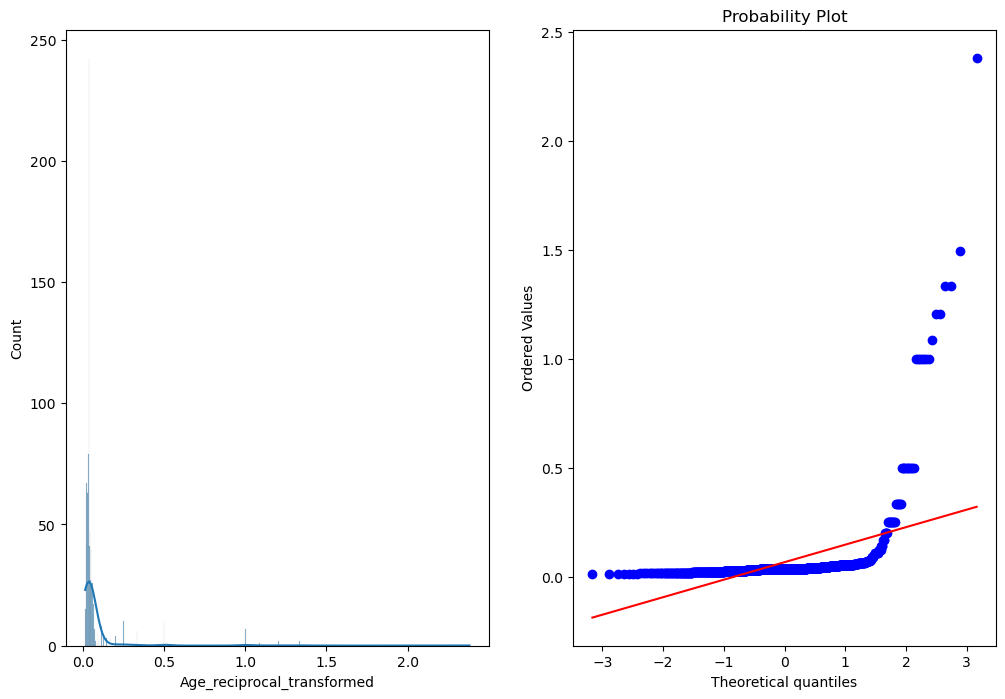

In [33]:
plt.figure(figsize=(12,8))

plot_qq_hist(data, "Age_reciprocal_transformed") 

#### From above diagram we can see that reciprocal transformation is also not working well on Age column as above plots are not showing normal distribution on transformed data.

# C. Square Root Transformation


In [36]:
# Lets apply square root transformation on Age column

data["Age_square_rooot_transformed"] = np.sqrt(data["Age"])
data

,Survived,Pclass,Age,Fare,Age_log_transformed,Fare_log_transformed,Age_reciprocal_transformed,Age_square_rooot_transformed
0,0,3,22.0,7.2500,3.091042,2.110213,0.045455,4.690416
1,1,1,38.0,71.2833,3.637586,4.280593,0.026316,6.164414
2,1,3,26.0,7.9250,3.258097,2.188856,0.038462,5.099020
3,1,1,35.0,53.1000,3.555348,3.990834,0.028571,5.916080
4,0,3,35.0,8.0500,3.555348,2.202765,0.028571,5.916080
...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,3.295837,2.639057,0.037037,5.196152
887,1,1,19.0,30.0000,2.944439,3.433987,0.052632,4.358899
888,0,3,28.0,23.4500,3.332205,3.196630,0.035714,5.291503
889,1,1,26.0,30.0000,3.258097,3.433987,0.038462,5.099020


C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


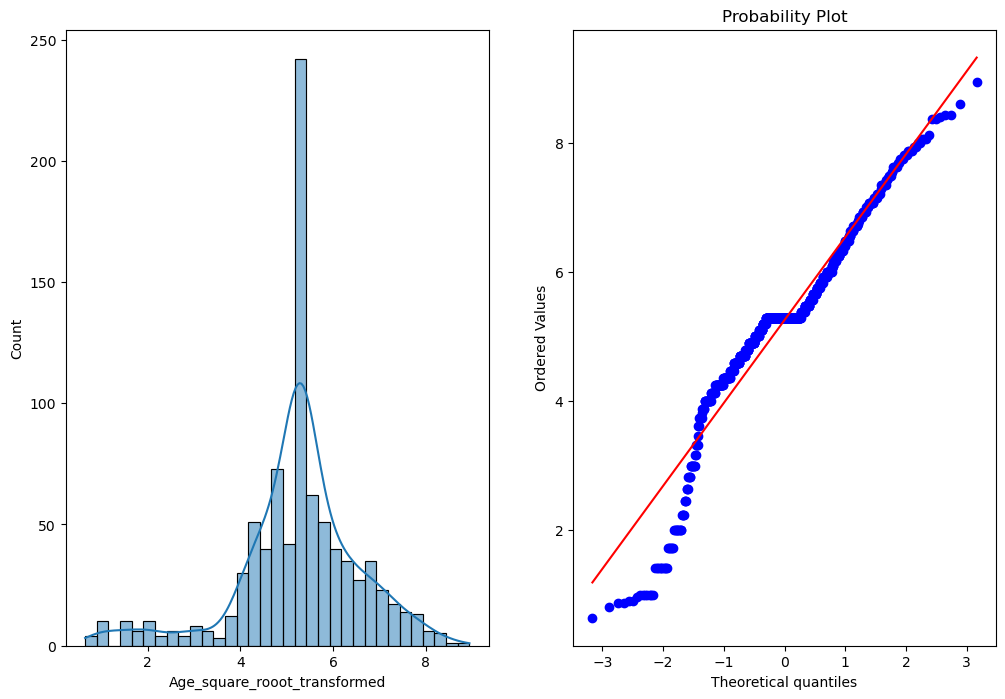

In [39]:
plt.figure(figsize=(12,8))

plot_qq_hist(data, "Age_square_rooot_transformed") 

### In above plot we can see that data is following normal distribution but not better than the original Age columns distribution, so we would not go ahead with this transformation as well

# D. Exponential Trnsformation


In [42]:
# lets try applying exponential transformation on Age column

data["Age_exp_transformed"] = data["Age"]**(1/1.2)
data

,Survived,Pclass,Age,Fare,Age_log_transformed,Fare_log_transformed,Age_reciprocal_transformed,Age_square_rooot_transformed,Age_exp_transformed
0,0,3,22.0,7.2500,3.091042,2.110213,0.045455,4.690416,13.142729
1,1,1,38.0,71.2833,3.637586,4.280593,0.026316,6.164414,20.724608
2,1,3,26.0,7.9250,3.258097,2.188856,0.038462,5.099020,15.105825
3,1,1,35.0,53.1000,3.555348,3.990834,0.028571,5.916080,19.351889
4,0,3,35.0,8.0500,3.555348,2.202765,0.028571,5.916080,19.351889
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,3.295837,2.639057,0.037037,5.196152,15.588457
887,1,1,19.0,30.0000,2.944439,3.433987,0.052632,4.358899,11.631293
888,0,3,28.0,23.4500,3.332205,3.196630,0.035714,5.291503,16.068119
889,1,1,26.0,30.0000,3.258097,3.433987,0.038462,5.099020,15.105825


C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


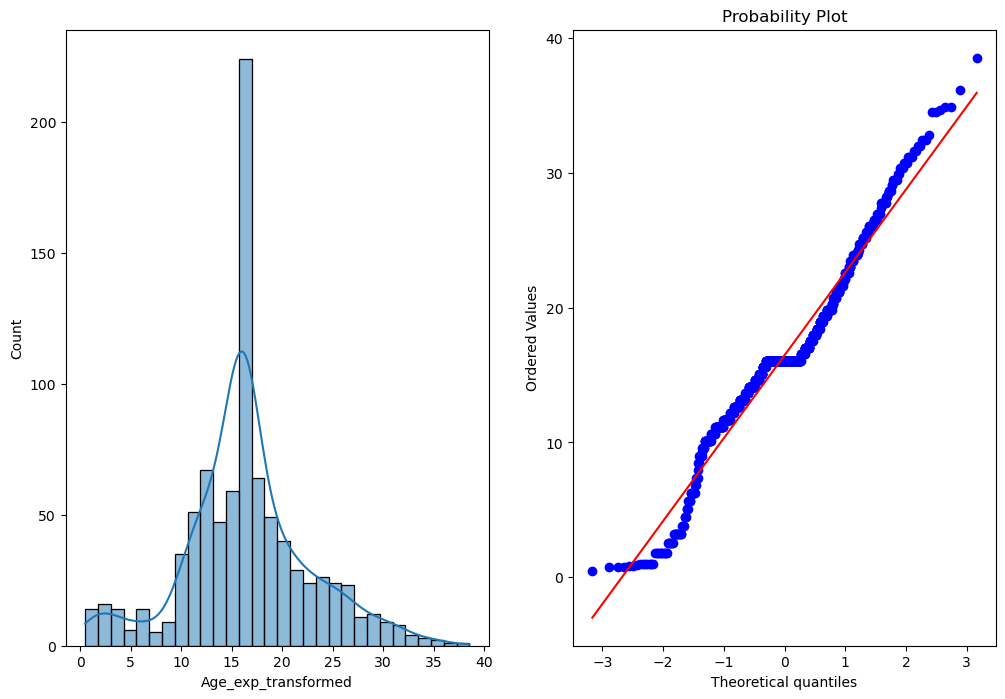

In [43]:
plt.figure(figsize=(12,8))

plot_qq_hist(data, "Age_exp_transformed") 

#### Now, from above plots we can see that the tranformed column is following proper normal distribution (better than the original "Age" column, so we can go ahead with exponential transformation)

### Log transformation works well on data which is following skewed distribution/ which is highly skewed.

### In above example, we have seen that "Fare" column was following skewed distribution.So lets try applying log transformation on that column to convert it into gaussian distribution.


C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


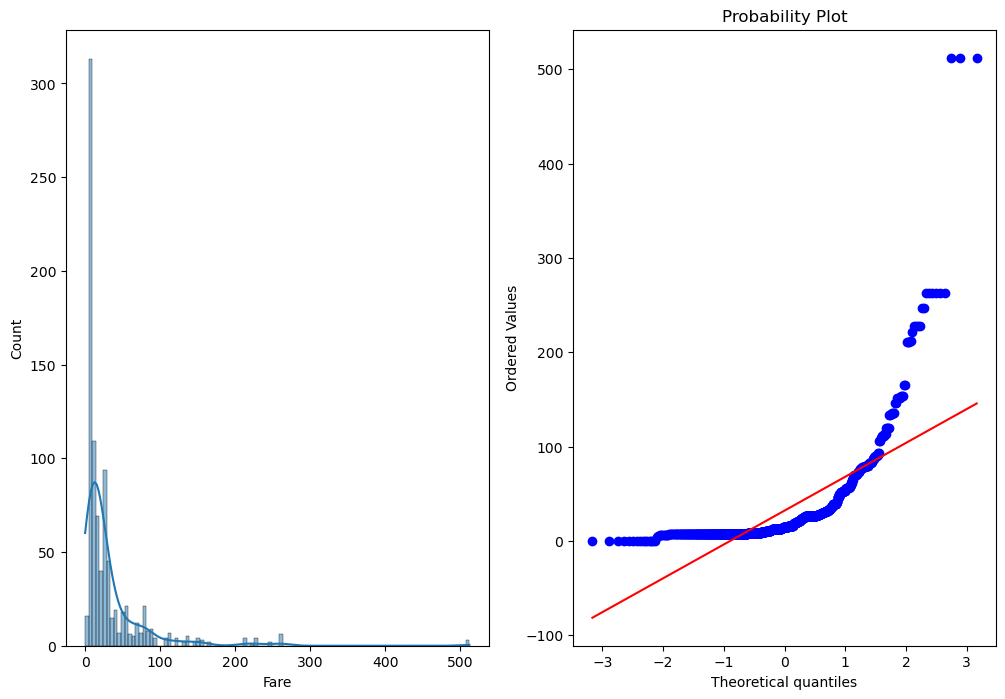

In [29]:
plt.figure(figsize=(12,8))

plot_qq_hist(data, "Fare") 

# E. BoxCox transformation

The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

check the explanation on internet.

In [45]:
# Lets apply boxcox transformation on Age column

data["Age_boxcox"], parameters = stat.boxcox(data["Age"])
data

,Survived,Pclass,Age,Fare,Age_log_transformed,Fare_log_transformed,Age_reciprocal_transformed,Age_square_rooot_transformed,Age_exp_transformed,Age_boxcox
0,0,3,22.0,7.2500,3.091042,2.110213,0.045455,4.690416,13.142729,13.468119
1,1,1,38.0,71.2833,3.637586,4.280593,0.026316,6.164414,20.724608,21.498728
2,1,3,26.0,7.9250,3.258097,2.188856,0.038462,5.099020,15.105825,15.563417
3,1,1,35.0,53.1000,3.555348,3.990834,0.028571,5.916080,19.351889,20.056110
4,0,3,35.0,8.0500,3.555348,2.202765,0.028571,5.916080,19.351889,20.056110
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,3.295837,2.639057,0.037037,5.196152,15.588457,16.076643
887,1,1,19.0,30.0000,2.944439,3.433987,0.052632,4.358899,11.631293,11.845513
888,0,3,28.0,23.4500,3.332205,3.196630,0.035714,5.291503,16.068119,16.586014
889,1,1,26.0,30.0000,3.258097,3.433987,0.038462,5.099020,15.105825,15.563417


In [48]:
print(parameters)

0.7964531473656952


C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


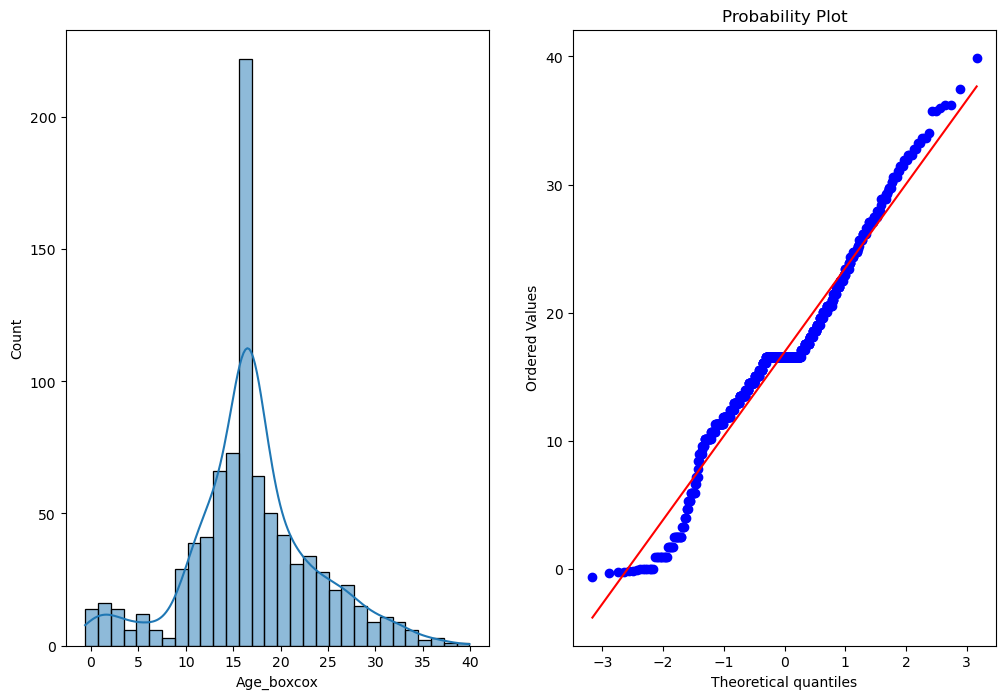

In [46]:
plt.figure(figsize=(12,8))

plot_qq_hist(data, "Age_boxcox") 

### From above plot we can see that BoxCox transformed Age column is following the normal distribution ( better than Age column distribution ). Hence, we can go ahead with this transformation too.

### In above diagram, in 1st plot, we can see that data is right skewed and in 2nd plot we can see that most points are not properly set on straight line.
### This proves that data is not following normal distribution.

In [30]:
# Lets apply log transformation on "Fare" column.

data["Fare_log_transformed"] = np.log(data["Fare"]+1) # Here, we are adidng 1 in data, because in case if value is 0, it would give error. To avoid that error, we are adding 1 in every value. It would not create much difference in a data.
data

,Survived,Pclass,Age,Fare,Age_log_transformed,Fare_log_transformed
0,0,3,22.0,7.2500,3.091042,2.110213
1,1,1,38.0,71.2833,3.637586,4.280593
2,1,3,26.0,7.9250,3.258097,2.188856
3,1,1,35.0,53.1000,3.555348,3.990834
4,0,3,35.0,8.0500,3.555348,2.202765
...,...,...,...,...,...,...
886,0,2,27.0,13.0000,3.295837,2.639057
887,1,1,19.0,30.0000,2.944439,3.433987
888,0,3,28.0,23.4500,3.332205,3.196630
889,1,1,26.0,30.0000,3.258097,3.433987


C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


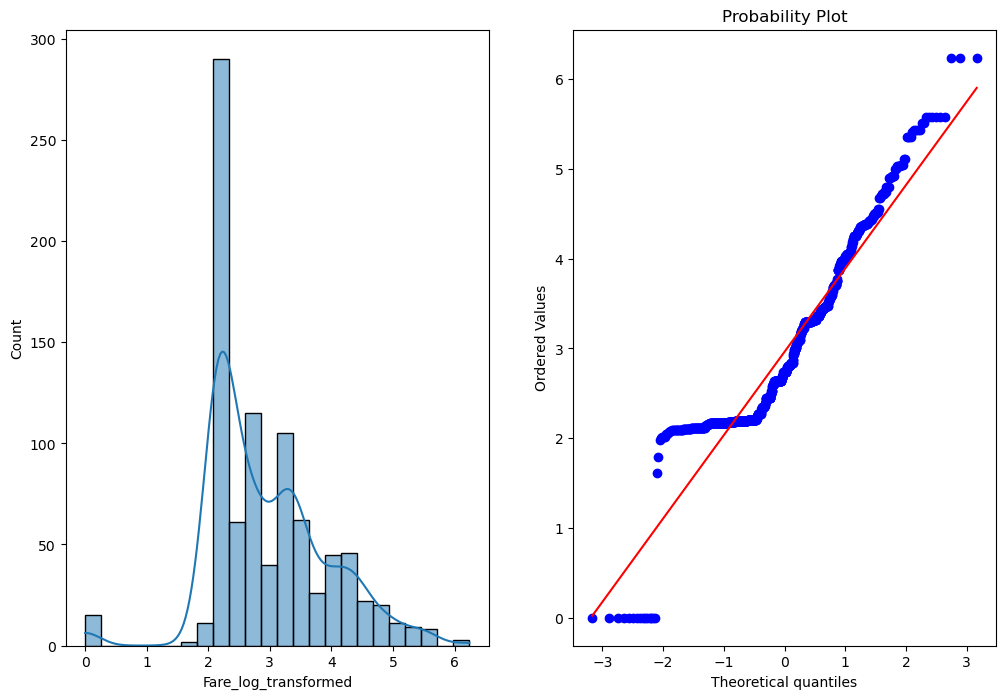

In [31]:
plt.figure(figsize=(12,8))

plot_qq_hist(data, "Fare_log_transformed") 

### In above plots we can see that new transformed column is showing normal distribution (not best, but better). So, we can use log transformation on Fare column

In [52]:
# Lets try boxcox transformation on fare column

data["Fare_boxcox"], parameters = stat.boxcox(data["Fare"]+1) # Here, we are adding 1 , because boxcox does not take negative values. Soif we add one, negative values would get converted into positive values
data

,Survived,Pclass,Age,Fare,Age_log_transformed,Fare_log_transformed,Age_reciprocal_transformed,Age_square_rooot_transformed,Age_exp_transformed,Age_boxcox,Fare_boxcox
0,0,3,22.0,7.2500,3.091042,2.110213,0.045455,4.690416,13.142729,13.468119,1.906724
1,1,1,38.0,71.2833,3.637586,4.280593,0.026316,6.164414,20.724608,21.498728,3.497640
2,1,3,26.0,7.9250,3.258097,2.188856,0.038462,5.099020,15.105825,15.563417,1.970459
3,1,1,35.0,53.1000,3.555348,3.990834,0.028571,5.916080,19.351889,20.056110,3.304258
4,0,3,35.0,8.0500,3.555348,2.202765,0.028571,5.916080,19.351889,20.056110,1.981680
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,3.295837,2.639057,0.037037,5.196152,15.588457,16.076643,2.326029
887,1,1,19.0,30.0000,2.944439,3.433987,0.052632,4.358899,11.631293,11.845513,2.916885
888,0,3,28.0,23.4500,3.332205,3.196630,0.035714,5.291503,16.068119,16.586014,2.745246
889,1,1,26.0,30.0000,3.258097,3.433987,0.038462,5.099020,15.105825,15.563417,2.916885


C:\Users\aishp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


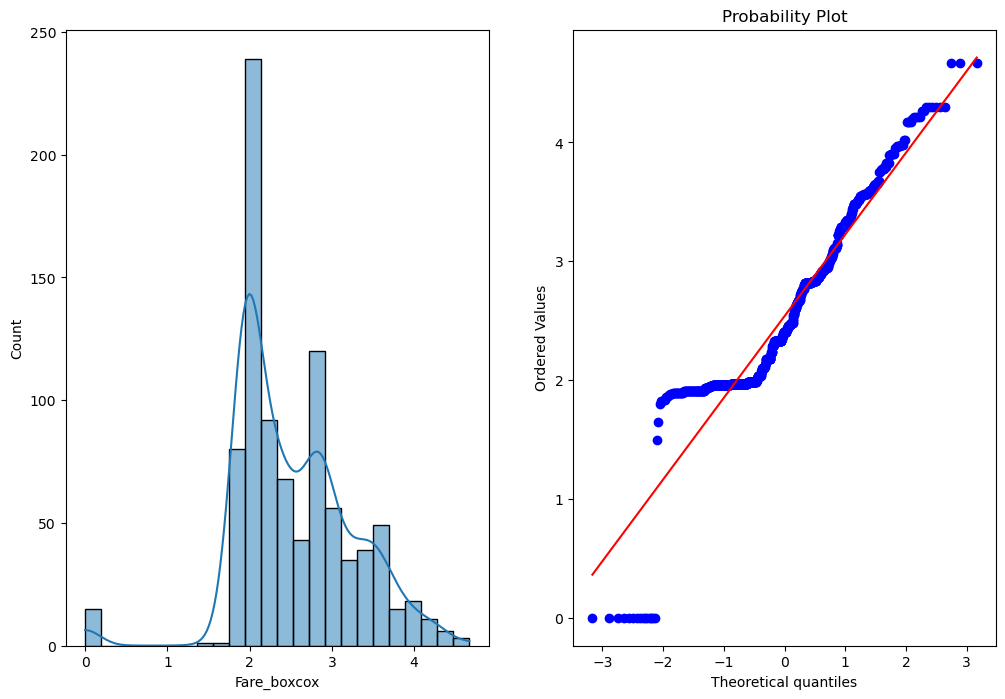

In [53]:
plt.figure(figsize=(12,8))

plot_qq_hist(data, "Fare_boxcox") 

### In above plots we can see that new transformed column is showing normal distribution (not best, but better). So, we can use boxcox transformation as well on Fare column

# Which step should we perform first ? - Standardisation or transformation

First check if your data is following the gaussian distribution or not. If not following gaussian distribution, then perform transformation, convert into gaussian distribution and then apply standarisation.
If it is following gaussian distribution, then just directly go with standarisation.